<a href="https://colab.research.google.com/github/dushyanth-pulaparthi/CROP_YIELD/blob/main/CROP_YIELD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

           Crop  Crop_Year       Season  State     Area  Production  \
0      Arecanut       1997  Whole Year   Assam  73814.0       56708   
1     Arhar/Tur       1997  Kharif       Assam   6637.0        4685   
2   Castor seed       1997  Kharif       Assam    796.0          22   
3      Coconut        1997  Whole Year   Assam  19656.0   126905000   
4  Cotton(lint)       1997  Kharif       Assam   1739.0         794   

   Annual_Rainfall  Fertilizer  Pesticide        Yield  
0           2051.4  7024878.38   22882.34     0.796087  
1           2051.4   631643.29    2057.47     0.710435  
2           2051.4    75755.32     246.76     0.238333  
3           2051.4  1870661.52    6093.36  5238.051739  
4           2051.4   165500.63     539.09     0.420909  
Crop               0
Crop_Year          0
Season             0
State              0
Area               0
Production         0
Annual_Rainfall    0
Fertilizer         0
Pesticide          0
Yield              0
dtype: int64
🌾 Model 

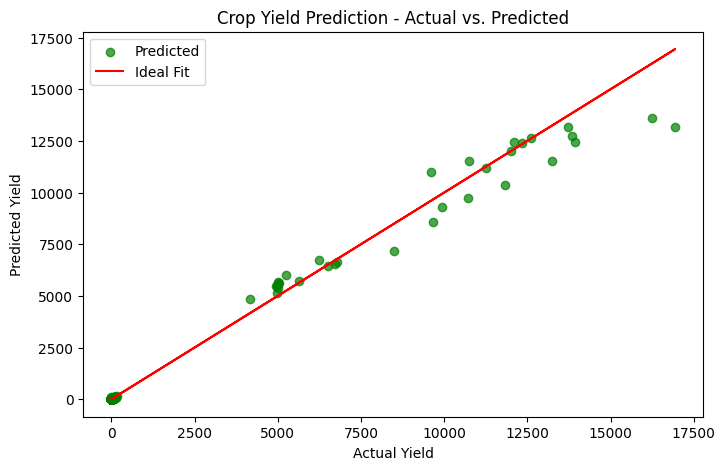

Predicted Crop Yield: 0.80 tons per hectare


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

# Load dataset (replace with actual dataset path)
df = pd.read_csv("crop_yield.csv")

# Display first few rows of the dataset
print(df.head())

# Check for missing values
print(df.isnull().sum())

# Drop rows with missing values
df.dropna(inplace=True)

# Encode categorical variables (if any)
df = pd.get_dummies(df, drop_first=True)

# Split dataset into features (X) and target (y)
X = df.drop(columns=["Yield"])  # Features (Soil, Rainfall, Temperature, etc.)
y = df["Yield"]  # Target (Crop Yield)

# Train-test split (80-20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Scaling (Normalization)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 🌱 Train Random Forest Model
rf_model = RandomForestRegressor(n_estimators=200, random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Predict on test set
y_pred = rf_model.predict(X_test_scaled)

# Evaluate model performance
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"🌾 Model Performance - MAE: {mae:.2f}, R² Score: {r2:.2f}")

# Visualize Actual vs. Predicted Yield
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, alpha=0.7, color="green", label="Predicted")
plt.plot(y_test, y_test, 'r', label="Ideal Fit")
plt.xlabel("Actual Yield")
plt.ylabel("Predicted Yield")
plt.legend()
plt.title("Crop Yield Prediction - Actual vs. Predicted")
plt.show()

# Function to predict crop yield based on new input data
def predict_crop_yield(input_features):
    input_data = np.array(input_features).reshape(1, -1)
    input_data = scaler.transform(input_data)  # Scale input
    prediction = rf_model.predict(input_data)
    return prediction[0]

# Example usage
sample_input = X.iloc[0].values  # Taking first row as an example
predicted_yield = predict_crop_yield(sample_input)
print(f"Predicted Crop Yield: {predicted_yield:.2f} tons per hectare")


In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

# Load dataset (replace with actual dataset path)
df = pd.read_csv("crop_yield.csv")

# Check for missing values
print(df.isnull().sum())

# Drop rows with missing values
df.dropna(inplace=True)

# Extract unique values for user input
states = df["State"].unique().tolist()
crops = df["Crop"].unique().tolist()
seasons = df["Season"].unique().tolist()

# Encode categorical variables
df = pd.get_dummies(df, columns=["State", "Crop", "Season"], drop_first=True)

# Split dataset into features (X) and target (y)
X = df.drop(columns=["Yield"])  # Features (Soil, Rainfall, Temperature, etc.)
y = df["Yield"]  # Target (Crop Yield)

# Train-test split (80-20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Scaling (Normalization)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Random Forest Model
rf_model = RandomForestRegressor(n_estimators=200, random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Predict on test set
y_pred = rf_model.predict(X_test_scaled)

# Evaluate model performance
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"🌾 Model Performance - MAE: {mae:.2f}, R² Score: {r2:.2f}")

# Visualize Actual vs. Predicted Yield
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, alpha=0.7, color="green", label="Predicted")
plt.plot(y_test, y_test, 'r', label="Ideal Fit")
plt.xlabel("Actual Yield")
plt.ylabel("Predicted Yield")
plt.legend()
plt.title("Crop Yield Prediction - Actual vs. Predicted")
plt.show()

# Function to predict crop yield based on user input
def predict_crop_yield(state, crop, season):
    input_data = pd.DataFrame(columns=X.columns)
    input_data.loc[0] = [0] * len(X.columns)  # Initialize with zeros

    # Encode categorical variables
    state_col = f"State_{state}"
    crop_col = f"Crop_{crop}"
    season_col = f"Season_{season}"

    if state_col in input_data.columns:
        input_data[state_col] = 1
    if crop_col in input_data.columns:
        input_data[crop_col] = 1
    if season_col in input_data.columns:
        input_data[season_col] = 1

    # Scale input data
    input_scaled = scaler.transform(input_data)

    # Predict yield
    prediction = rf_model.predict(input_scaled)
    return round(prediction[0], 2)

# Example Usage
print("Available States:", states)
print("Available Crops:", crops)
print("Available Seasons:", seasons)
print("Enter state")
state_input = input()  # Change as per user input
print("Enter crop")
crop_input = input()  # Change as per user input
print("Enter season")
season_input = input()  # Change as per user input

predicted_yield = predict_crop_yield(state_input, crop_input, season_input)
print(f"Predicted Crop Yield for {crop_input} in {state_input} during {season_input}: {predicted_yield} tons per hectare")


Crop               0
Crop_Year          0
Season             0
State              0
Area               0
Production         0
Annual_Rainfall    0
Fertilizer         0
Pesticide          0
Yield              0
dtype: int64
🌾 Model Performance - MAE: 7.27, R² Score: 0.99
Available States: ['Assam', 'Karnataka', 'Kerala', 'Meghalaya', 'West Bengal', 'Puducherry', 'Goa', 'Andhra Pradesh', 'Tamil Nadu', 'Odisha', 'Bihar', 'Gujarat', 'Madhya Pradesh', 'Maharashtra', 'Mizoram', 'Punjab', 'Uttar Pradesh', 'Haryana', 'Himachal Pradesh', 'Tripura', 'Nagaland', 'Chhattisgarh', 'Uttarakhand', 'Jharkhand', 'Delhi', 'Manipur', 'Jammu and Kashmir', 'Telangana', 'Arunachal Pradesh', 'Sikkim']
Available Crops: ['Arecanut', 'Arhar/Tur', 'Castor seed', 'Coconut ', 'Cotton(lint)', 'Dry chillies', 'Gram', 'Jute', 'Linseed', 'Maize', 'Mesta', 'Niger seed', 'Onion', 'Other  Rabi pulses', 'Potato', 'Rapeseed &Mustard', 'Rice', 'Sesamum', 'Small millets', 'Sugarcane', 'Sweet potato', 'Tapioca', 'Tobacco', 'Tu